import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# <h1> <center> Linear Regression  </center></h1>

Def : Linear regression attempts to model the relationship between two variables by fitting 
        a linear equation (= a straight line) to the observed data. One variable is considered to be an explanatory                variable (e.g. your income), and the other is considered to be a dependent variable (e.g. your expenses).

Mathematical Equation : y = m x + c
    
    y = Target Variable.(output)
    
    x = input Variable.
    
    m = Slope of the Line . (slope/Coeff).
    
    c = Intercept (The line meets at axis.)
    
    
    #Here The Values of the Target Variable is Continuos.
    
    

In [2]:
# Programme on the Linear Regression..

In [5]:
#importing the Required Libraries..

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing the dataset.Here we used the Boston Housing Dataset ..

Boston = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv")

In [4]:
#Printing the first 5  rows Data from the Dataset.

Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Before going th the Algorithm .we remove The unwanted Data and Null from the Dataset.
#Removing the column "Unnamed 0".

Boston = Boston.drop(["Unnamed: 0"],axis=1)

Boston[0:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
Boston.info()

#from here getting to knowing that We dont have any Null.

#And now Data is ready to Fit to the Model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#Importing the LinearRegression ALgorithm from the SKlearn.

# sklearn -----> Linear_model ----->LinearRegression.

from sklearn.linear_model import LinearRegression

In [9]:
#creating Object\instance  to the Model..

leg = LinearRegression()

In [10]:
# Adding the Feature and Target to X and Y Variables.
# Here We are taking the "crim,age,tax" as feature and "MEDV" as Target variable.

x = Boston[["crim","age","tax"]] # ---------> Features variable.(Independent variable)

y = Boston[["medv"]]   # -------->Target Variable.(Dependent variable)

In [11]:
# Here we are making 4 parts as Train and Test sets.

# sklearn -----> Model_selection -------> train_test_split.

from sklearn.model_selection import train_test_split

In [12]:
# Here Dataset is made into train,test and train for -->80% data and test for ----> 20% data.
#random_state is used to get same output for every execution.

x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2 ,random_state = 10)

In [13]:
# Training the model using Fit method  by Leg instance... leg = LinearRegression()

leg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Here we are Predicting the output for the x_test from Model.

y_pred = leg.predict(x_test)

In [15]:
#Actual values ..

y_test.head(5)

,medv
305,28.4
193,31.1
65,23.5
349,26.6
151,19.6


In [16]:
#predicted Values from the Model for given X_test.

y_pred[0:5]

array([[25.91399026],
       [28.54895854],
       [27.01369604],
       [25.92379597],
       [20.35695671]])

In [17]:
# To know the Error between actual and predicted values ..

from sklearn.metrics import mean_squared_error

In [18]:
# y_test and y_pred. 

mean_squared_error(y_test,y_pred)

91.4783744257556

In [19]:
# Here our model made 91 % error.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

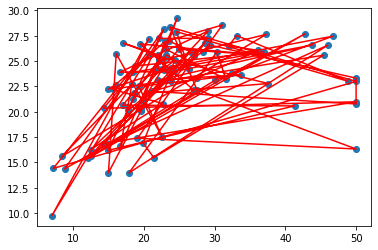

In [24]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred,color='Red')

In [24]:
#plotted the scatter plot between the actual and predicted..